In [2]:
import requests
import json

response = requests.get('https://cdn.pixabay.com/photo/2013/05/29/22/25/elephant-114543_960_720.jpg')
with open('example.jpg', 'wb') as f:
    f.write(response.content)

response = requests.get('https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json')
with open('labels.json', 'w') as f:
    f.write(response.text)

labels = json.load(open('labels.json'))

SSLError: HTTPSConnectionPool(host='cdn.pixabay.com', port=443): Max retries exceeded with url: /photo/2013/05/29/22/25/elephant-114543_960_720.jpg (Caused by SSLError(SSLZeroReturnError(6, 'TLS/SSL connection has been closed (EOF) (_ssl.c:1129)')))

In [6]:
import jax
import jax.numpy as jnp
import flaxmodels as fm

img = jnp.ones((224, 224, 3))

# Image should be in range [0, 1]
x = jnp.array(img, dtype=jnp.float32) 
# Add batch dimension
x = jnp.expand_dims(x, axis=0)

vgg16 = fm.VGG16(output='activations', pretrained='imagenet')
init_rngs = {'params': jax.random.PRNGKey(0), 'dropout': jax.random.PRNGKey(1)}
params = vgg16.init(init_rngs, x)
out = vgg16.apply(params, x, train=False)

for key in out.keys():
    print(key, out[key].shape)

conv1_1 (1, 224, 224, 64)
relu1_1 (1, 224, 224, 64)
conv1_2 (1, 224, 224, 64)
relu1_2 (1, 224, 224, 64)
conv2_1 (1, 112, 112, 128)
relu2_1 (1, 112, 112, 128)
conv2_2 (1, 112, 112, 128)
relu2_2 (1, 112, 112, 128)
conv3_1 (1, 56, 56, 256)
relu3_1 (1, 56, 56, 256)
conv3_2 (1, 56, 56, 256)
relu3_2 (1, 56, 56, 256)
conv3_3 (1, 56, 56, 256)
relu3_3 (1, 56, 56, 256)
conv4_1 (1, 28, 28, 512)
relu4_1 (1, 28, 28, 512)
conv4_2 (1, 28, 28, 512)
relu4_2 (1, 28, 28, 512)
conv4_3 (1, 28, 28, 512)
relu4_3 (1, 28, 28, 512)
conv5_1 (1, 14, 14, 512)
relu5_1 (1, 14, 14, 512)
conv5_2 (1, 14, 14, 512)
relu5_2 (1, 14, 14, 512)
conv5_3 (1, 14, 14, 512)
relu5_3 (1, 14, 14, 512)
fc6 (1, 4096)
relu6 (1, 4096)
fc7 (1, 4096)
relu7 (1, 4096)
fc8 (1, 1000)


In [9]:

out.keys()

dict_keys(['conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3', 'relu3_3', 'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3', 'relu4_3', 'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3', 'relu5_3', 'fc6', 'relu6', 'fc7', 'relu7', 'fc8'])

In [2]:
import jax
import jax_inception as inception
from jax import numpy as jnp
import functools


rng = jax.random.PRNGKey(0)
model = inception.InceptionV3(pretrained=True)
params = model.init(rng, jnp.ones((1, 256, 256, 3)))

x = jnp.ones((1, 256, 256, 3))
out = model.apply(params, x, train=False)

print(out.shape)

apply_fn = jax.jit(functools.partial(model.apply, params, train=False))

2024-05-24 16:15:30.495321: E external/xla/xla/stream_executor/cuda/cuda_blas.cc:190] failed to create cublas handle: the library was not initialized
2024-05-24 16:15:30.495396: E external/xla/xla/stream_executor/cuda/cuda_blas.cc:193] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2024-05-24 16:15:30.592648: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:810] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2024-05-24 16:15:30.592712: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:813] Conv: (f32[1,32,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,256,256]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"co

XlaRuntimeError: UNKNOWN: Failed to determine best cudnn convolution algorithm for:
%cudnn-conv.1 = (f32[1,32,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,256,256]{3,2,1,0} %transpose, f32[32,3,3,3]{3,2,1,0} %transpose.1), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_name="jit(conv_general_dilated)/jit(main)/conv_general_dilated[window_strides=(2, 2) padding=((0, 0), (0, 0)) lhs_dilation=(1, 1) rhs_dilation=(1, 1) dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 3, 1, 2), rhs_spec=(3, 2, 0, 1), out_spec=(0, 3, 1, 2)) feature_group_count=1 batch_group_count=1 precision=None preferred_element_type=None]" source_file="/home/jovyan/nazar/ott/src/notebooks/jax_inception.py" source_line=221}, backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}

Original error: INTERNAL: All algorithms tried for (f32[1,32,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,256,256]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} failed. Falling back to default algorithm.  Per-algorithm errors:
  Profiling failure on cuDNN engine eng28{k2=4,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=3,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng1{k2=4,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=2,k4=0,k5=0,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=2,k4=1,k5=0,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=1,k4=3,k5=1,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=1,k4=2,k5=1,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=0,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng1{k2=2,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng48{k2=2,k6=0,k13=2,k14=0,k22=2}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng48{k2=2,k6=0,k13=1,k14=0,k22=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng48{k2=15,k6=0,k13=1,k14=0,k22=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=1,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=0,k13=2,k14=3,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=4,k13=0,k14=2,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=1,k13=0,k14=4,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng38{k2=0,k13=2,k14=3,k18=1,k22=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng38{k2=8,k13=1,k14=4,k18=0,k22=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=7,k13=0,k14=4,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=5,k13=1,k14=3,k18=1,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=5,k13=1,k14=3,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng39{k2=0,k12=-1,k13=2,k14=3,k15=0,k17=3,k18=1,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng36{k2=6,k13=0,k14=2,k18=0,k23=2}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng1{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng41{k2=8,k12=-1,k13=1,k14=4,k15=0,k17=3,k18=1,k22=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng41{k2=3,k12=-1,k13=0,k14=2,k15=0,k17=3,k18=1,k22=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng39{k2=5,k12=-1,k13=1,k14=3,k15=0,k17=3,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng39{k2=5,k12=-1,k13=1,k14=3,k15=0,k17=3,k18=1,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng4{}: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.

In [2]:
apply_fn(x)

Array([[[[0.14967482, 0.        , 0.05604753, ..., 0.18608278,
          0.5640286 , 0.18663561]]]], dtype=float32)

In [3]:
from notebooks.inception import InceptionV3

def freeze(model):
    for p in model.parameters():
        p.requires_grad_(False)
    model.eval()  

model = InceptionV3().cuda()
freeze(model)

/home/nazar/anaconda3/envs/icvf/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nazar/anaconda3/envs/icvf/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [11]:

import torch 
out2 = model.forward(torch.ones(1, 3, 256, 256).cuda())
out2[0]

tensor([[[[0.1502]],

         [[0.0000]],

         [[0.0558]],

         ...,

         [[0.1858]],

         [[0.5632]],

         [[0.1878]]]], device='cuda:0')

In [10]:
(out2[0].cpu().numpy() - out).max()

Array(4.923354, dtype=float32)

In [ ]:
from notebooks.tools import calculate_frechet_distance, get_loader_stats, get_pushed_loader_stats, load_dataset
from typing import Iterator, Literal, NamedTuple, Optional, Tuple
import dataclasses
import jax
from jax import numpy as jnp
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from ott.neural.methods.expectile_neural_dual import ExpectileNeuralDual
from ott.geometry import costs
from notebooks.resnet import ResNet_D
from notebooks.unet import UNet2, UNet
import optax
import os
import torch
import gc
import random
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

image_size = 128
batch_size = 32
# DATASET_12_LIST = ('handbag', f'/home/nazar/projects/handbag_{image_size}.hdf5', 
#                    'shoes', f'/home/nazar/projects/shoes_{image_size}.hdf5')

# DATASET_12_LIST = ('ffhq_faces', '/home/nazar/projects/ffhq_faces/', 
#                     'comic_faces', '/home/nazar/projects/comic_faces_v2/')

DATASET_12_LIST = ('celeba_female', '/home/jovyan/nazar/celeba_female/', 
                   'aligned_anime_faces', '/home/jovyan/nazar/aligned_anime_faces/')

train_source, test_source = load_dataset(DATASET_12_LIST[0], DATASET_12_LIST[1], img_size=image_size, batch_size=batch_size, device="cpu")
gc.collect()
train_target, test_target = load_dataset(DATASET_12_LIST[2], DATASET_12_LIST[3], img_size=image_size, batch_size=batch_size, device="cpu")
# gc.collect()

dataset = test_source.loader.dataset

# indices = [1, 100, 200, 300, 400]
indices = [1000, 1003, 1304, 1693, 1799, 1963, 2204, 2029, 1329, 1559, 4324, 3352, 9848, 8839]
# indices = [0, 7449, 1050, 9439, 2714]
# indices = [8676, 7364, 2499, 6776, 5939, 3244, 5932, 5670, 1793, 2346]
print(indices)
X = torch.cat([dataset[i][0][None] for i in indices]).numpy()
X = X.reshape((-1, 3 * image_size * image_size))
gc.collect()

neural_f = UNet(image_size, 3, 3, 48 * 2)
neural_g = ResNet_D(image_size, nfilter=48 * 2, nlayers=5)

num_train_iters = 150_100

lr_schedule_f = optax.cosine_decay_schedule(
    init_value=1e-4, decay_steps=num_train_iters, alpha=1e-2
)

lr_schedule_g = optax.cosine_decay_schedule(
    init_value=5e-5, decay_steps=num_train_iters, alpha=1e-2
)


optimizer_f = optax.adamw(learning_rate=lr_schedule_f, b1=0.5, b2=0.5)
optimizer_g = optax.adamw(learning_rate=lr_schedule_g, b1=0.5, b2=0.5)

print("init ot")

(5, 49152)
(10, 128, 128, 3)


/tmp/ipykernel_476987/4287431449.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


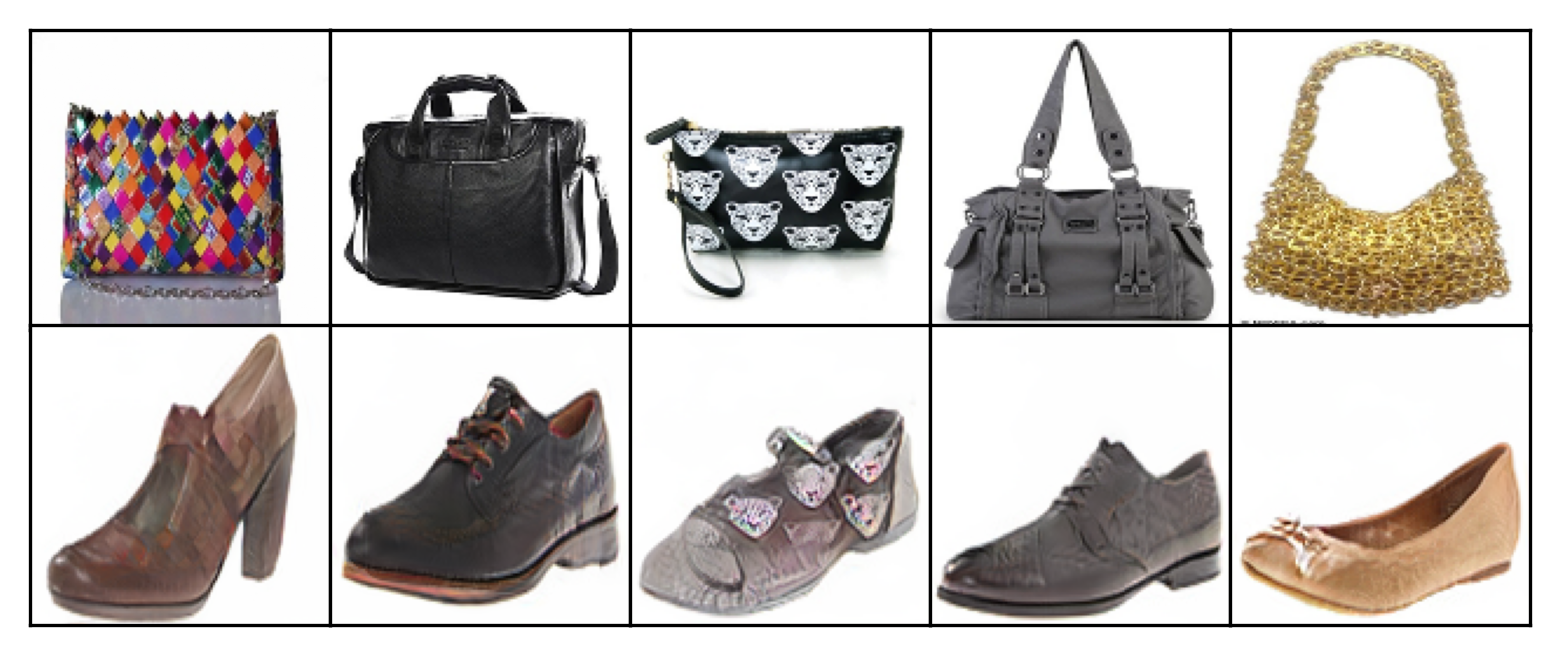

In [6]:
potentials = ExpectileNeuralDual(
    3 * image_size * image_size,
    neural_f,
    neural_g,
    optimizer_f,
    optimizer_g,
    cost_fn=MSECost(),
    num_train_iters=num_train_iters,
    expectile=0.98,
    expectile_loss_coef=1.0,
    rng=jax.random.PRNGKey(5),
    is_bidirectional=False,
    start_step=90_002
    # use_dot_product=True
).to_dual_potentials()

T_X = np.asarray(potentials.transport(X))
print(T_X.shape)

def to_img(x):
    x = x.reshape(-1, 3, image_size, image_size).transpose(0, 2, 3, 1)
    x = (x * 0.5 + 0.5).clip(0., 1.)
    return x
  
imgs = to_img(np.concatenate([X, T_X])) 


print(imgs.shape)
fig, axes = plt.subplots(2, len(indices), figsize=(len(indices), 2), dpi=300)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([])


fig.tight_layout(pad=0.001)
fig.show()


[0, 243, 947, 1030, 906]
(5, 49152)
(10, 128, 128, 3)


/tmp/ipykernel_476987/698476779.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


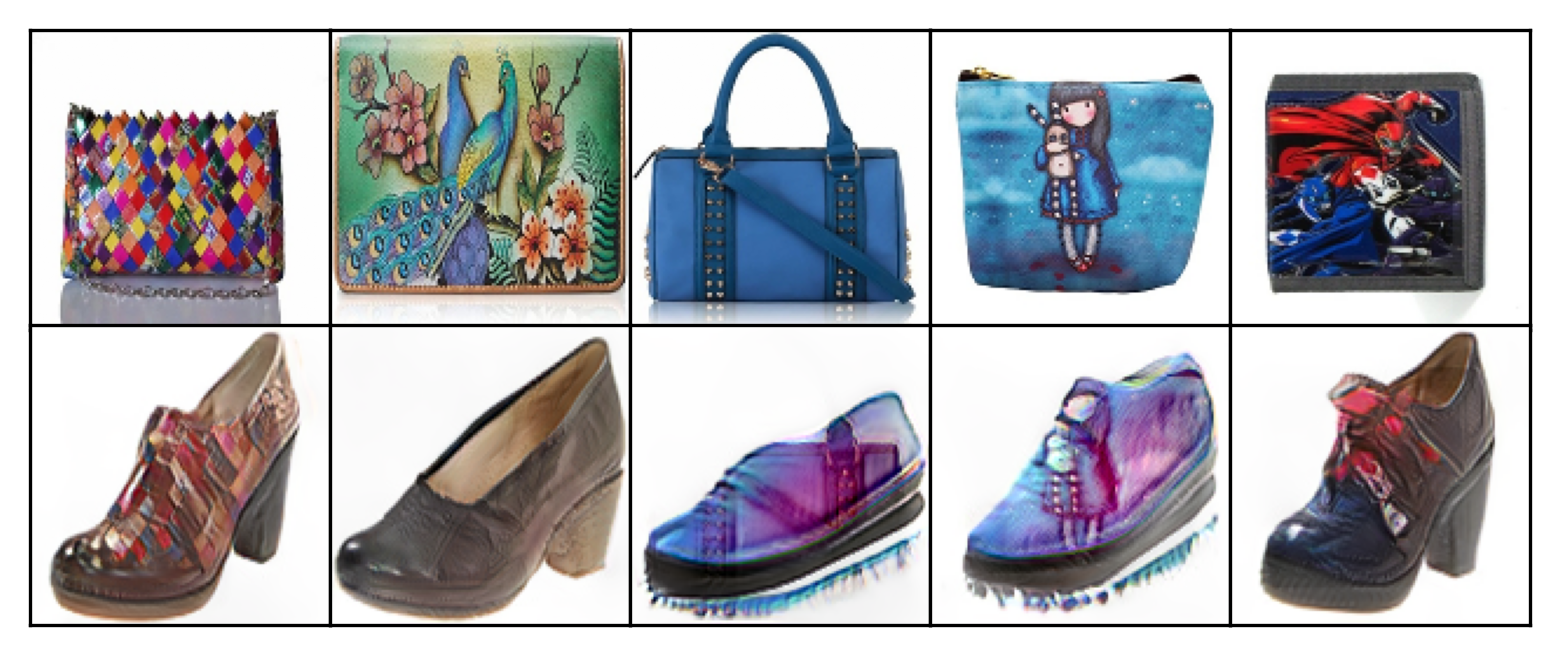

In [12]:
indices = [0, 243, 947, 1030, 906]
print(indices)
X = torch.cat([dataset[i][0][None] for i in indices]).numpy()
X = X.reshape((-1, 3 * image_size * image_size))

potentials = ExpectileNeuralDual(
    3 * image_size * image_size,
    neural_f,
    neural_g,
    optimizer_f,
    optimizer_g,
    cost_fn=MSECost(),
    num_train_iters=num_train_iters,
    expectile=0.98,
    expectile_loss_coef=1.0,
    rng=jax.random.PRNGKey(5),
    is_bidirectional=False,
    start_step=60_002
    # use_dot_product=True
).to_dual_potentials()

T_X = np.asarray(potentials.transport(X))
print(T_X.shape)

def to_img(x):
    x = x.reshape(-1, 3, image_size, image_size).transpose(0, 2, 3, 1)
    x = (x * 0.5 + 0.5).clip(0., 1.)
    return x
  
imgs = to_img(np.concatenate([X, T_X])) 


print(imgs.shape)
fig, axes = plt.subplots(2, len(indices), figsize=(len(indices), 2), dpi=300)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([])


fig.tight_layout(pad=0.001)
fig.show()
